# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
df
df["Diff"]=df.diff().shift(-1)
df["Target"]=np.sign(df['Diff'])
df['Premium']=0.08*df['Adj Close']

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [6]:
y = df.loc[:"2023-09-30","Target"].copy()
df=df.loc[:"2023-09-30"].copy()

In [7]:
logreg=LogisticRegression()
logreg.fit(X,y)
y_pred=logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [8]:
df['Prediction']=y_pred

In [9]:
df['Profits']=0.

In [10]:
#True positives
df.loc[(df['Prediction']==1)&(df['Target']==1),'Profits']=df['Premium']
#False positives
df.loc[(df['Prediction']==1)&(df['Target']==-1),'Profits']=100*df['Diff']+df['Premium']


# 5.) Plot profits over time

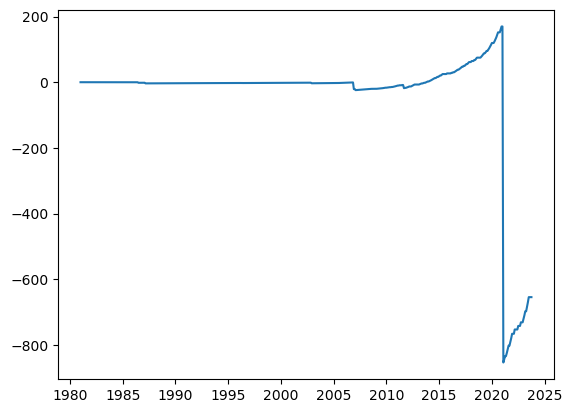

In [11]:
plt.plot(np.cumsum(df['Profits']))
plt.show()

## 5.5)

In [ ]:
I can use modelized way to calculate the 

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.